# EDA - Stroke Prediction

In [362]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# print("Path to dataset files:", path)

path = path + '\healthcare-dataset-stroke-data.csv'

print("Path to dataset files:", path)

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
C:\Users\olmos\AppData\Local\Temp\ipykernel_21400\1167846223.py:8: SyntaxWarning: invalid escape sequence '\h'
  path = path + '\healthcare-dataset-stroke-data.csv'


Path to dataset files: C:\Users\olmos\.cache\kagglehub\datasets\fedesoriano\stroke-prediction-dataset\versions\1\healthcare-dataset-stroke-data.csv


In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [364]:
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [366]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [367]:
df = df.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


What is the balance of the dataset?

In [368]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

We observe that it is an unbalanced dataset with a clear predominance of non-stroke cases (0)

In [369]:
print(df.isnull().sum())
percentage_NaNs = df['bmi'].isnull().sum() / len(df)

print(f"Porcentaje de NaNs: {percentage_NaNs*100}")

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Porcentaje de NaNs: 3.9334637964774952


We observe null values in BMI and 3.93% of the data.

Next, observe the values we have in BMI to see if there are any anomalous values or outliers.

<Axes: xlabel='bmi', ylabel='Count'>

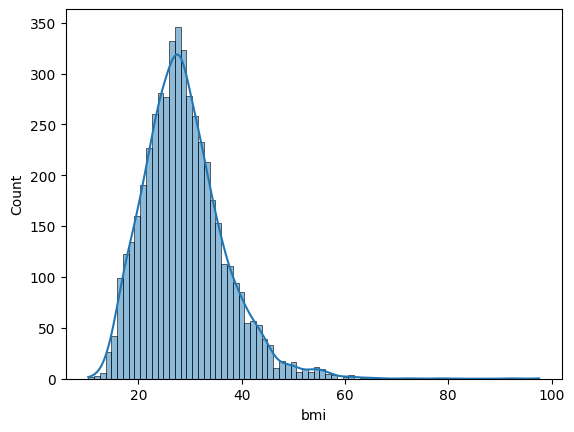

In [370]:
sns.histplot(df['bmi'],kde=True)

<Axes: ylabel='bmi'>

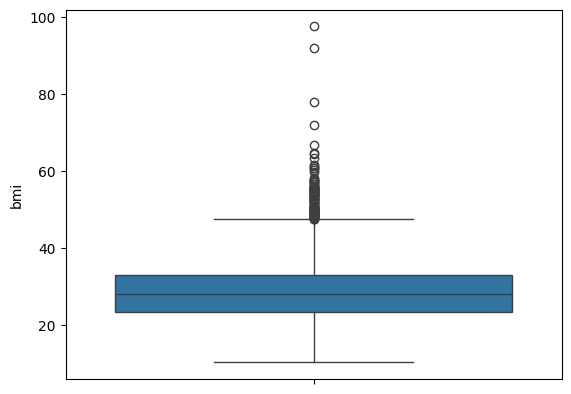

In [371]:
sns.boxplot(data=df, y='bmi')

En este caso, se observa un gran número de outliers por encima de BMI = 35 aproximadamente, por lo que la mediana será nuestor mejor valor para rellenar los valores NaNs. 

In [372]:
median = df['bmi'].median()
mean = df['bmi'].mean()
print(f"Median is: {median}")
print(f"Mean is: {mean}")

Median is: 28.1
Mean is: 28.893236911794666


Mean is higher due to outliers

In [373]:
df['bmi'] = df['bmi'].fillna(median)
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [374]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Analysis of numerical variables

In [375]:
numerical_variables = df.select_dtypes(exclude='object').columns.to_list()
print(numerical_variables)
print(len(numerical_variables))

for x in range(0,len(numerical_variables)):
    print(f"Unique values of {numerical_variables[x]}: {df[numerical_variables[x]].nunique()}")

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
6
Unique values of age: 104
Unique values of hypertension: 2
Unique values of heart_disease: 2
Unique values of avg_glucose_level: 3979
Unique values of bmi: 418
Unique values of stroke: 2


In this way, we can see the number of unique values for each characteristic and select those that will provide us with information when we view them

In [376]:
variables_to_eliminate = ['hypertension','heart_disease','stroke']
numerical_variables = [item for item in numerical_variables if item not in variables_to_eliminate]

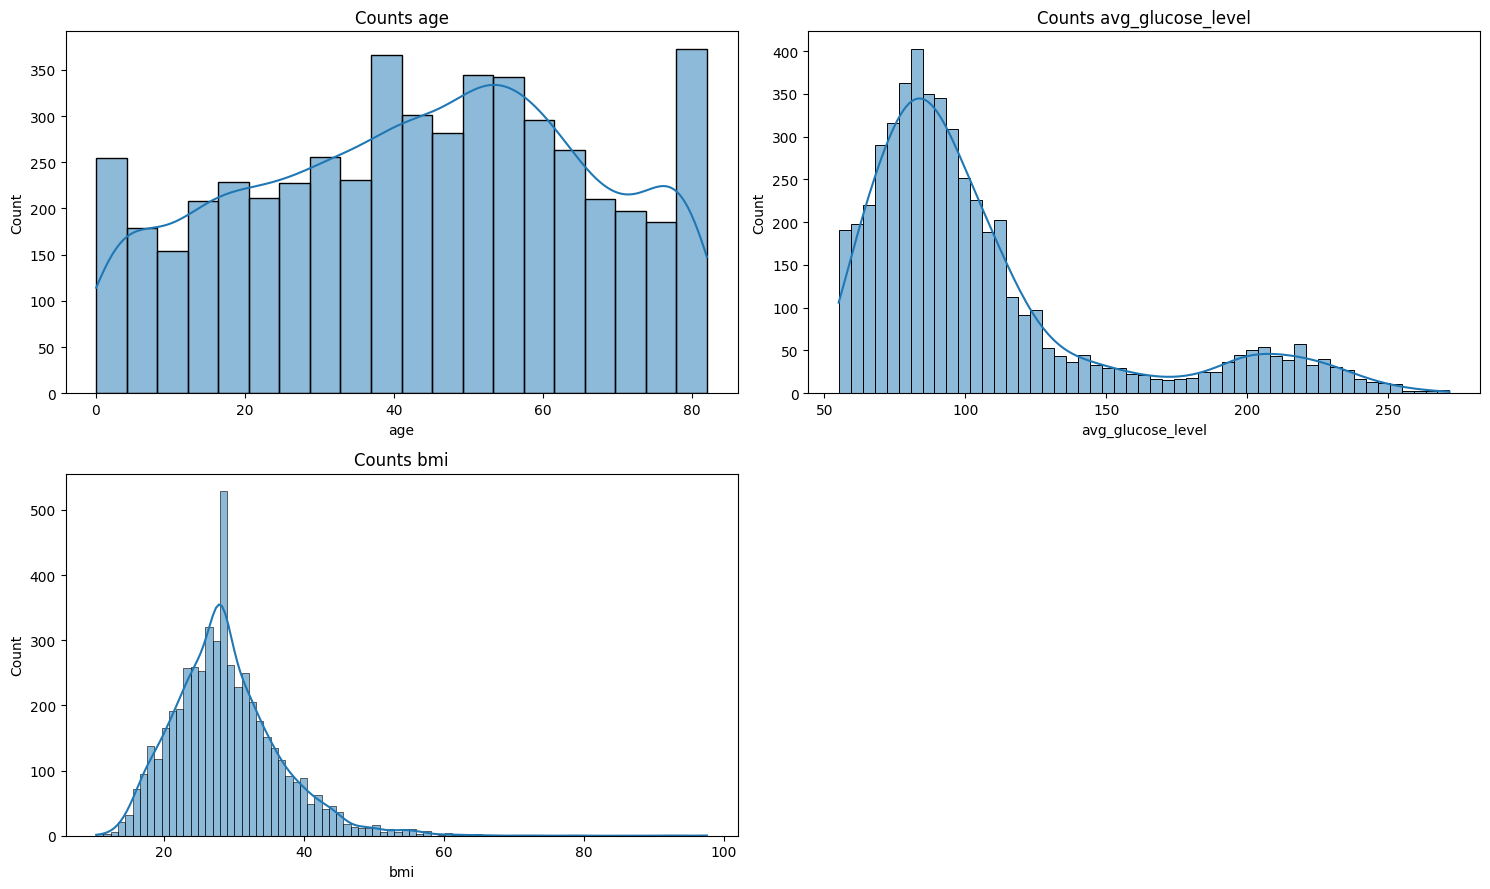

In [377]:
n_cols = 2
n_rows = math.ceil(len(numerical_variables) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4.5))

for var, ax in zip(numerical_variables, axes.flat):
    sns.histplot(data=df, x=var, ax=ax, kde=True)
    ax.set_title(f'Counts {var}')

total_plots = n_rows * n_cols
for i in range(len(numerical_variables), total_plots):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

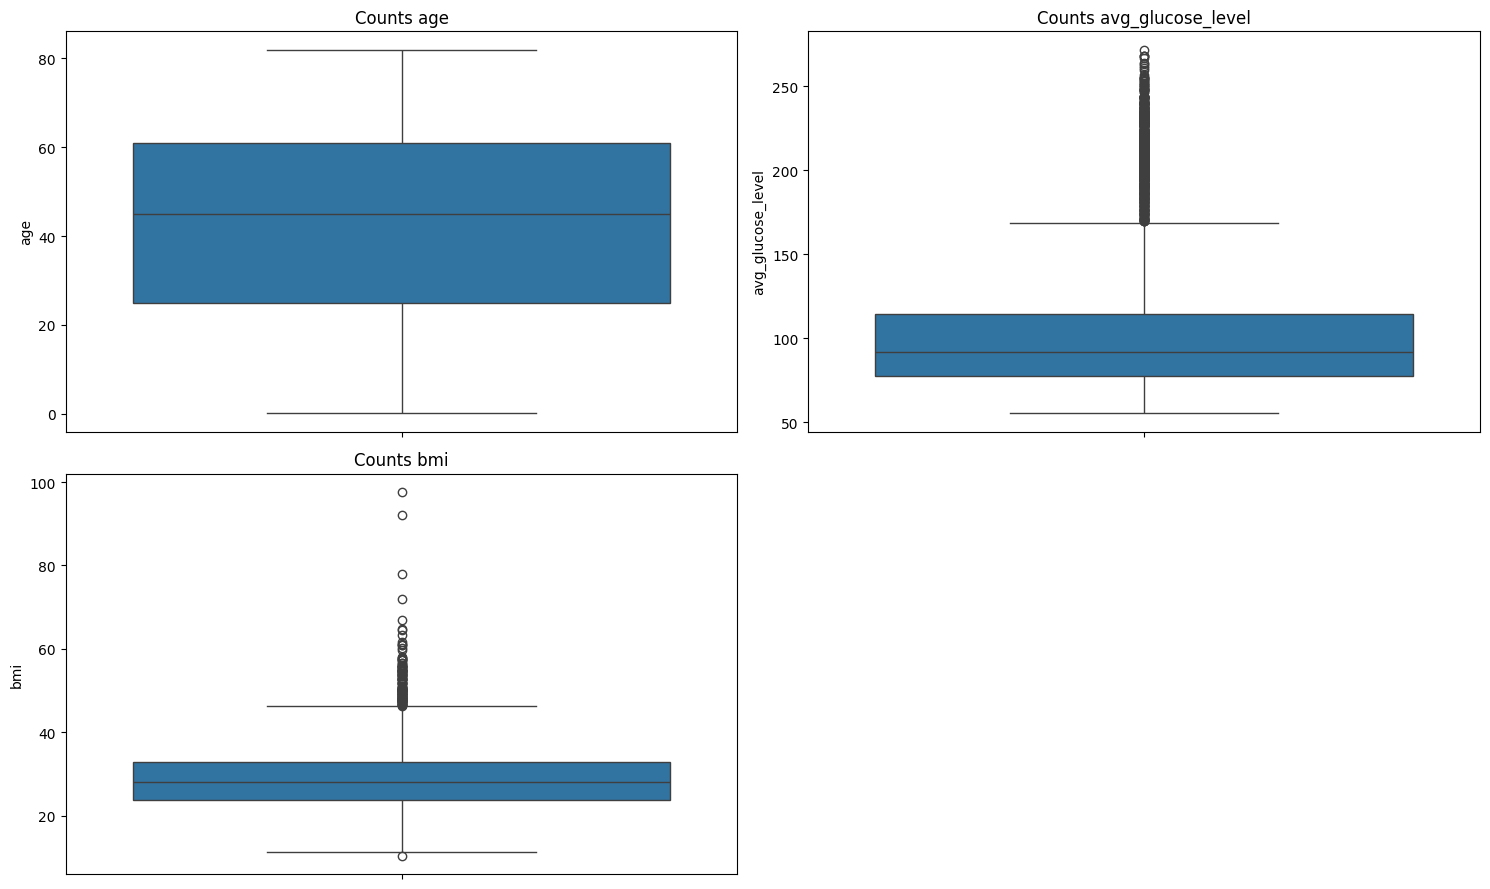

In [378]:
n_cols = 2
n_rows = math.ceil(len(numerical_variables) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4.5))

for var, ax in zip(numerical_variables, axes.flat):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Counts {var}')

total_plots = n_rows * n_cols
for i in range(len(numerical_variables), total_plots):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()


To evaluate the categorical columns, the ones we removed earlier are useful because even though they were numerical, they acted as two-state categories

In [379]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [380]:
categorical_variables = df.select_dtypes(include='object').columns.tolist() + variables_to_eliminate
print(categorical_variables)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


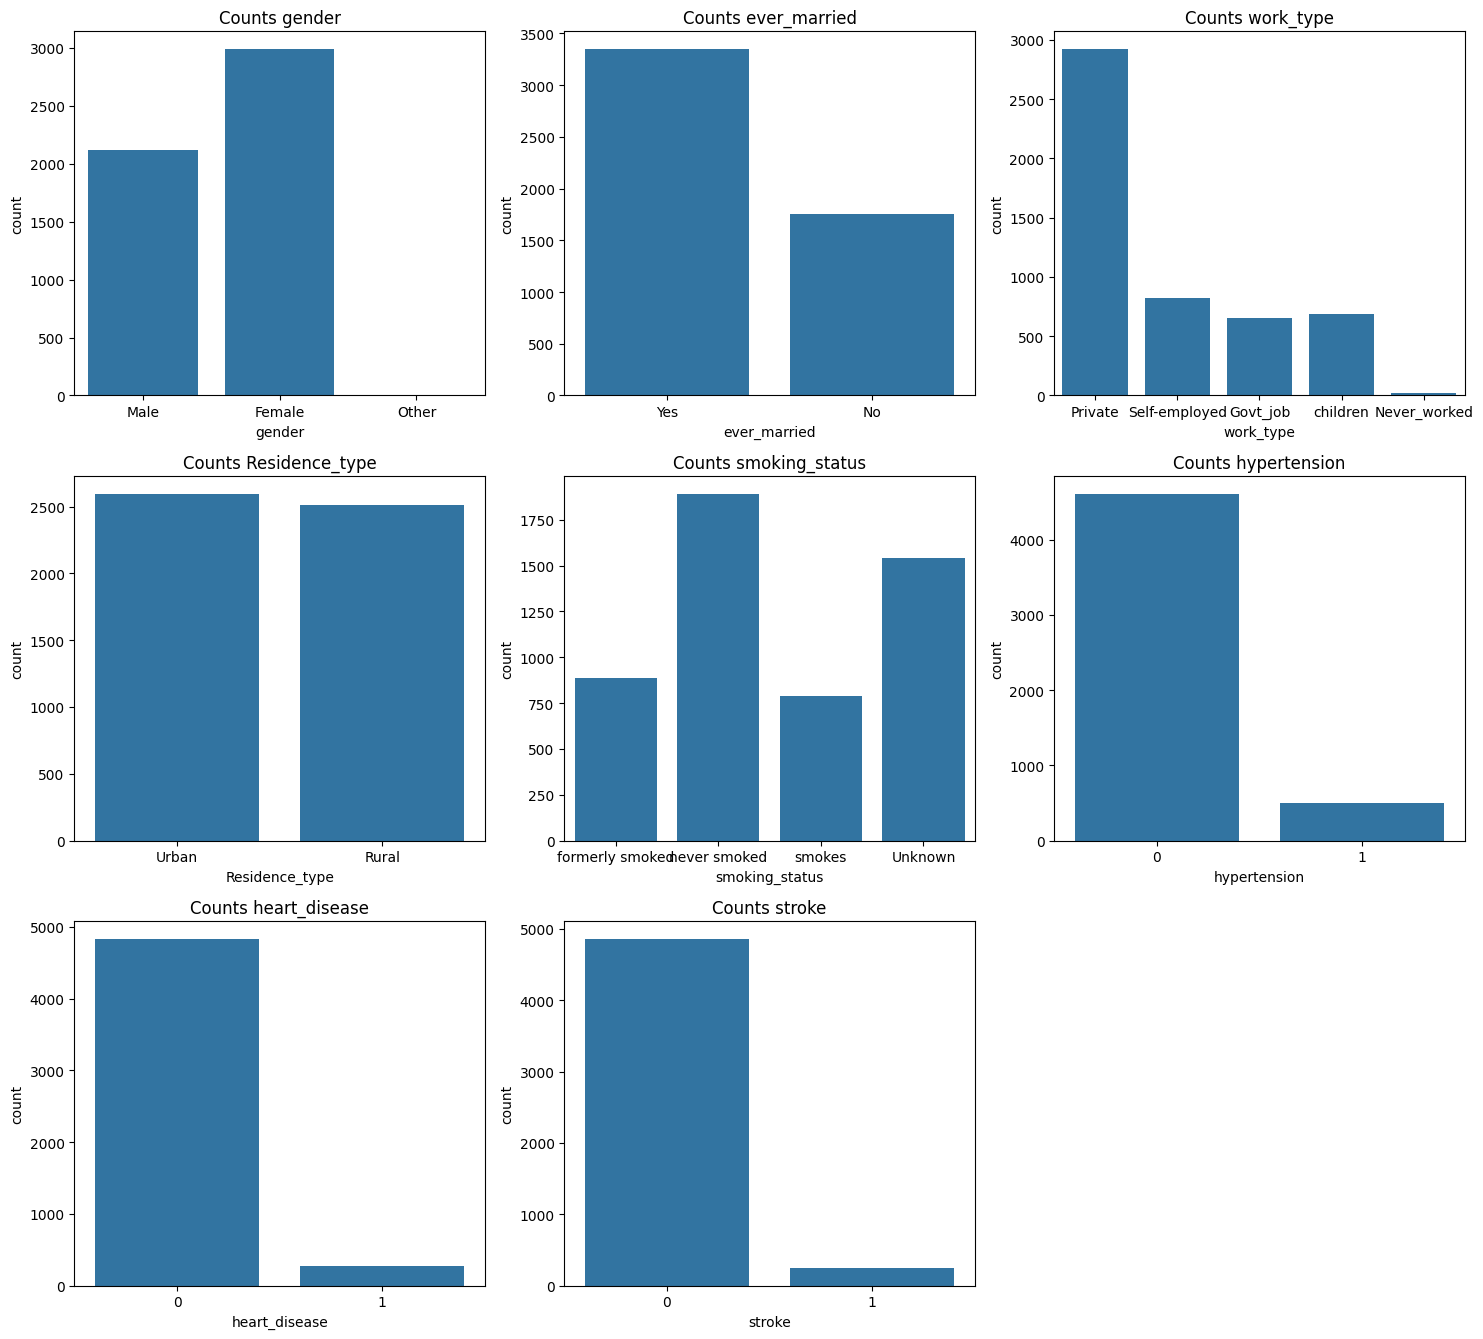

In [381]:
n_cols = 3
n_rows = math.ceil(len(categorical_variables) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4.5))

for var, ax in zip(categorical_variables, axes.flat):
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_title(f'Counts {var}')

total_plots = n_rows * n_cols
for i in range(len(categorical_variables), total_plots):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

### Bivariate Analysis

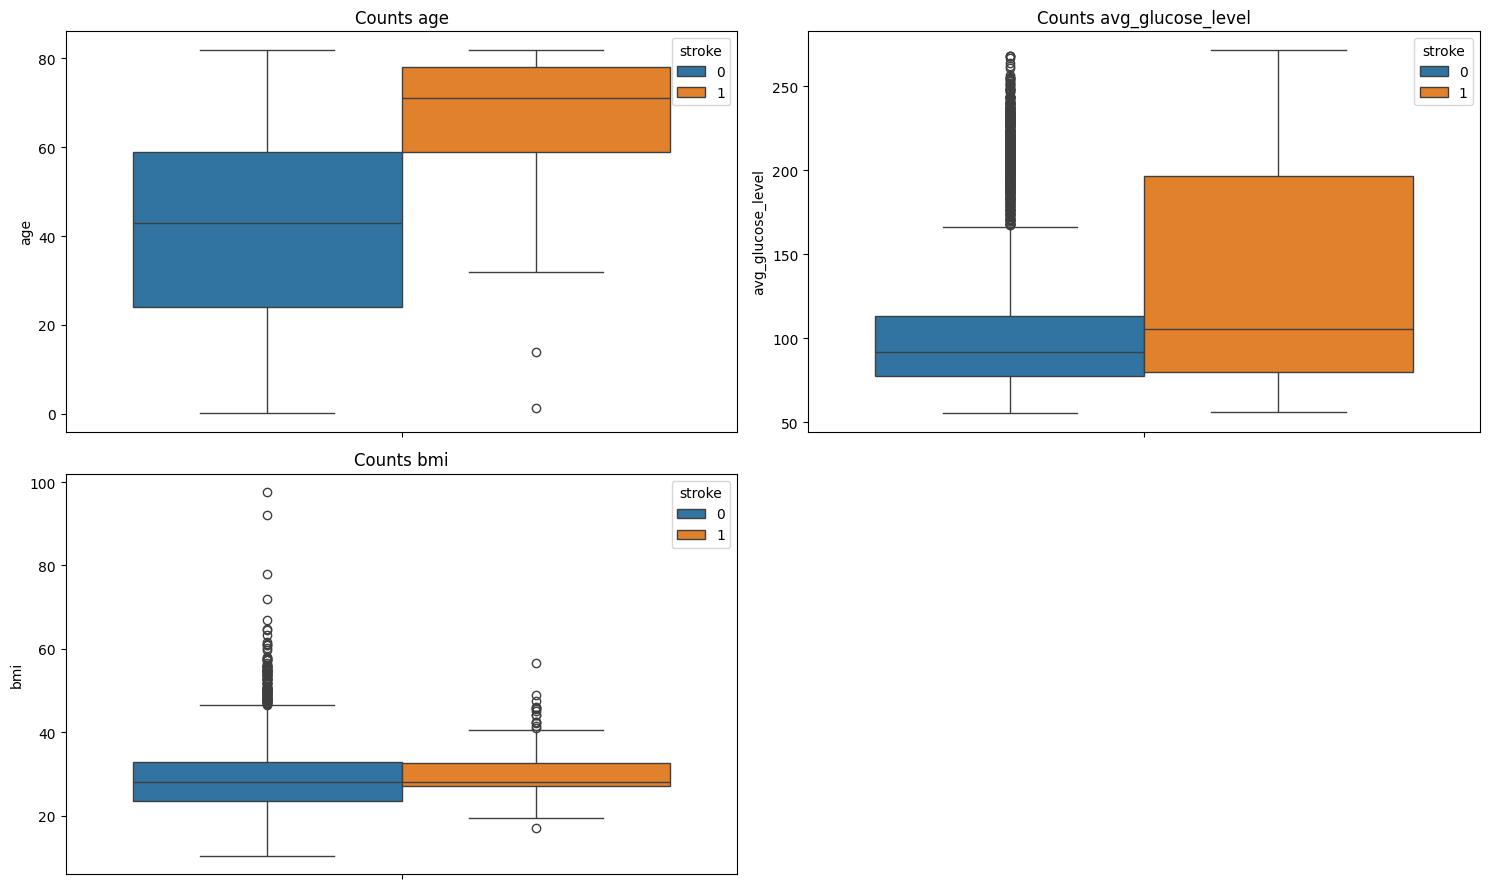

In [382]:
n_cols = 2
n_rows = math.ceil(len(numerical_variables) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4.5))

for var, ax in zip(numerical_variables, axes.flat):
    sns.boxplot(data=df, y=var, ax=ax, hue = 'stroke')
    ax.set_title(f'Counts {var}') 

total_plots = n_rows * n_cols
for i in range(len(numerical_variables), total_plots):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

From this, it can be seen that the older the age, the greater the likelihood of stroke, and the higher the glucose levels, the greater the likelihood of stroke

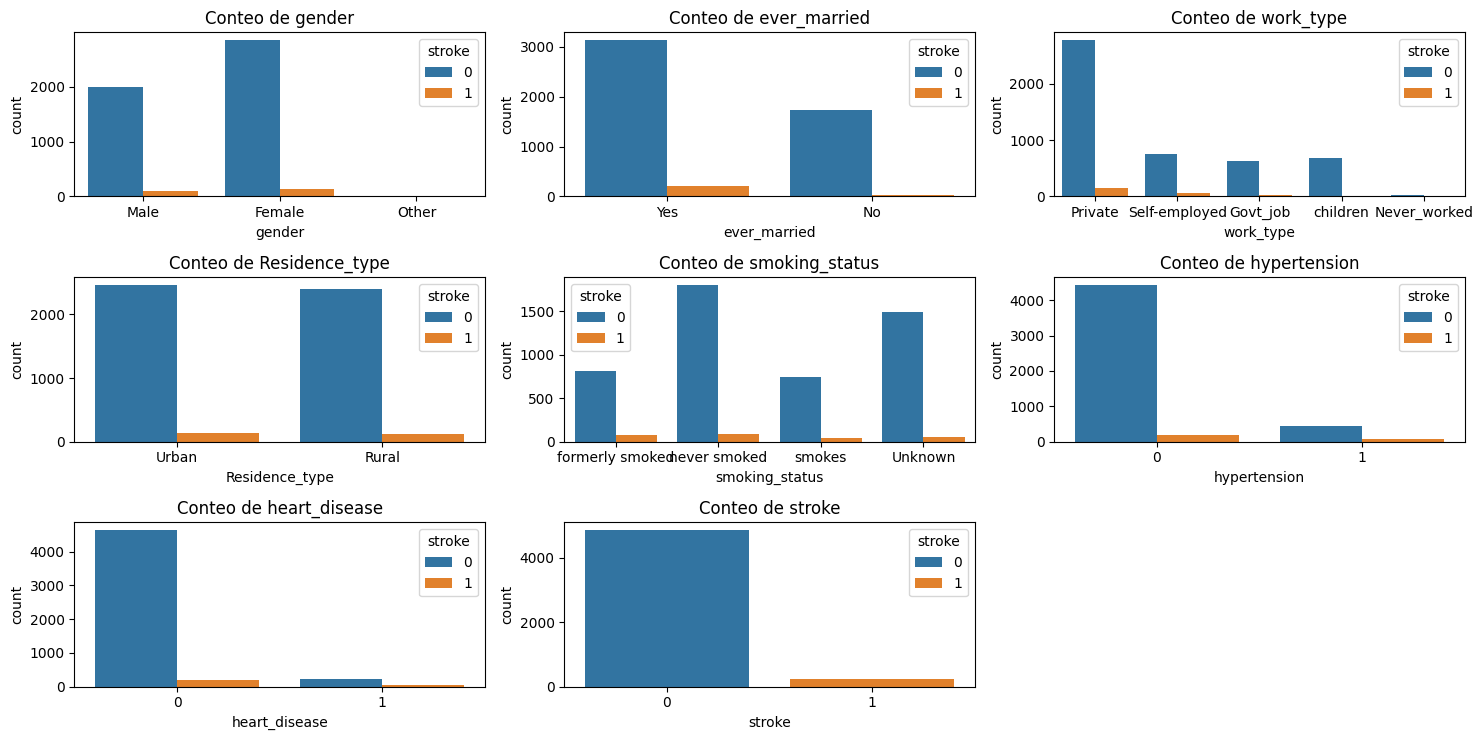

In [383]:
# 2. Decide cuántas columnas quieres
# (3 columnas suele ser un buen balance)
n_cols = 3

# 3. Calcula cuántas filas necesitas
n_rows = math.ceil(len(categorical_variables) / n_cols)

# 4. Crea el lienzo y los ejes (MÁS GRANDE)
# figsize=(ancho_total, alto_total)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 2.5))

# 5. Itera y grafica
# 'axes.flat' convierte la cuadrícula (ej. 3x3) en una lista simple (9 elementos)
# 'zip' nos permite iterar sobre las variables y los ejes al mismo tiempo
for var, ax in zip(categorical_variables, axes.flat):
    # ¡LA CLAVE! Usa 'y=var' para hacerlo horizontal y legible
    sns.countplot(data=df, x=var, ax=ax, hue='stroke')
    ax.set_title(f'Conteo de {var}') # Añade un título a cada gráfico

# 6. Oculta los ejes que no se usen
total_plots = n_rows * n_cols
for i in range(len(categorical_variables), total_plots):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

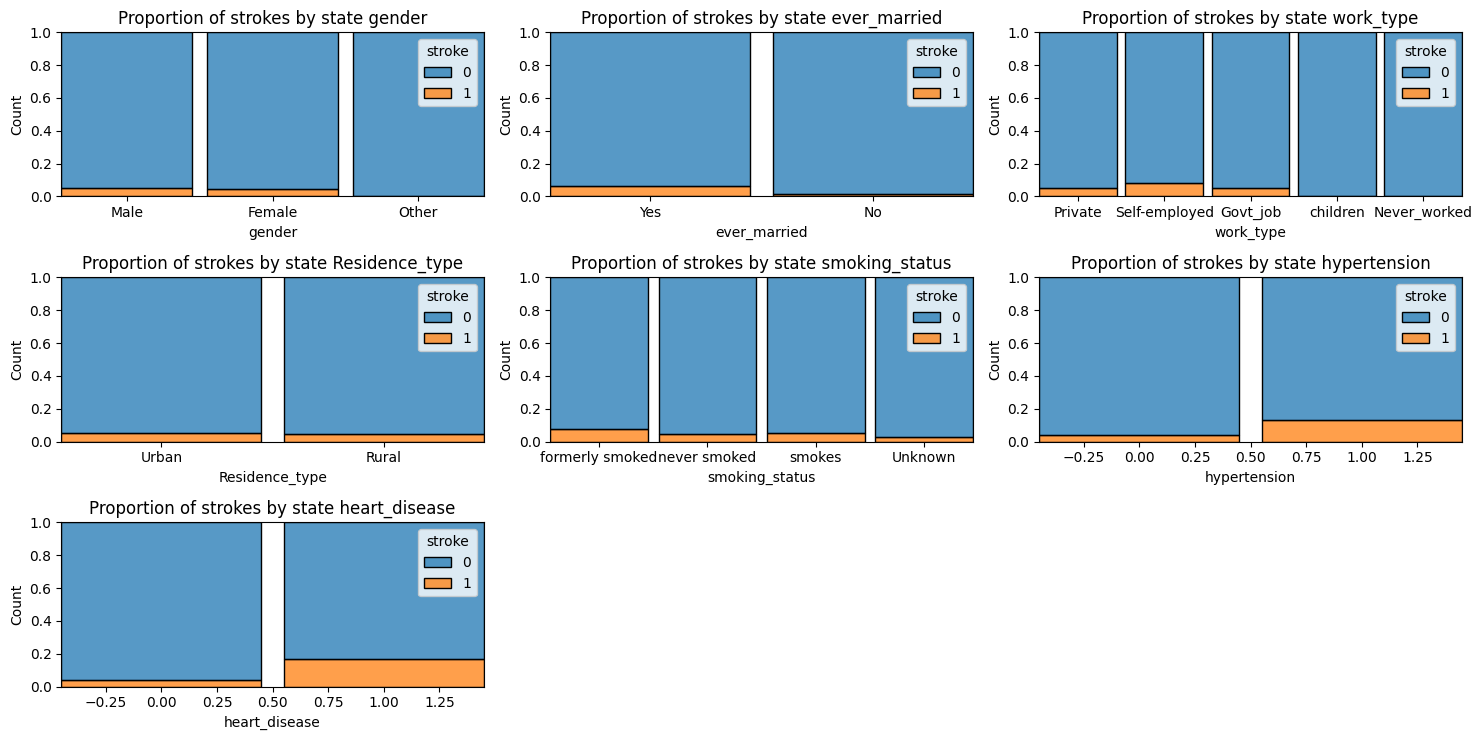

In [384]:
# Eliminating this feature due to is included with parameter 'hue'
categorical_variables.remove('stroke')

n_cols = 3
n_rows = math.ceil(len(categorical_variables) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 2.5))

for var, ax in zip(categorical_variables, axes.flat):
    sns.histplot(data=df, 
            x=var,
            ax=ax,
            hue='stroke',     
            multiple='fill',     
            discrete=True,  
            shrink=0.9)          

    
    ax.set_title(f'Proportion of strokes by state {var}')

total_plots = n_rows * n_cols
for i in range(len(categorical_variables), total_plots):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

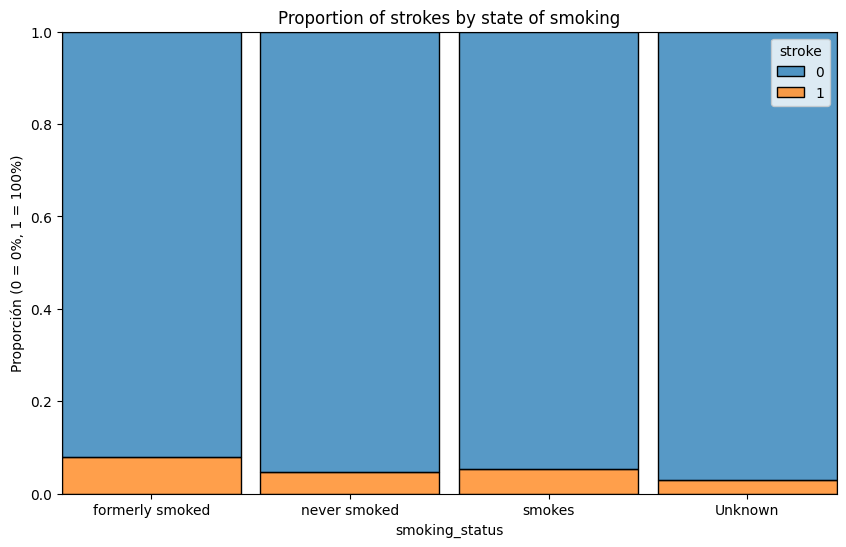

In [385]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, 
             x='smoking_status',  
             hue='stroke',        
             multiple='fill',     
             shrink=0.9)         

plt.ylabel("Proporción (0 = 0%, 1 = 100%)")
plt.title("Proportion of strokes by state of smoking")
plt.show()

In [386]:

percentage_table = pd.crosstab(df['smoking_status'], df['stroke'], normalize='index')

print(percentage_table * 100)

stroke                   0         1
smoking_status                      
Unknown          96.955959  3.044041
formerly smoked  92.090395  7.909605
never smoked     95.243129  4.756871
smokes           94.676806  5.323194


### Correlation Matrix

In [387]:
df_encoded = df.copy()
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


For a complete correlation matrix, we must perform one-hot encoding or label encoding on categorical variables of type object

In [388]:
variables_object = df.select_dtypes(include='object').columns.tolist() 
print(variables_object)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [389]:
for _,name in enumerate(variables_object):
    print(f"{name} : {df[name].nunique()}")

gender : 3
ever_married : 2
work_type : 5
Residence_type : 2
smoking_status : 4


In [390]:
df[(df['gender']!='Male') & (df['gender']!='Female')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Apply label encoding to binary categorical columns

In [391]:
residence_type_le = {
    "Urban": 1,
    "Rural": 0
}

married_le = {
    "Yes": 1,
    "No": 0
}

df_encoded['Residence_type'] = df_encoded['Residence_type'].map(residence_type_le)
df_encoded['ever_married'] = df_encoded['ever_married'].map(married_le)
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


Apply One Hot Encoding to non-binary categorical columns

In [392]:
df_encoded = pd.get_dummies(df_encoded, ['gender','work_type','smoking_status'])
df_encoded.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,False,True,False,False,False,True,False,False
1,61.0,0,0,1,0,202.21,28.1,1,True,False,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False,False,False,False,True,False
3,49.0,0,0,1,1,171.23,34.4,1,True,False,False,False,False,True,False,False,False,False,False,True
4,79.0,1,0,1,0,174.12,24.0,1,True,False,False,False,False,False,True,False,False,False,True,False


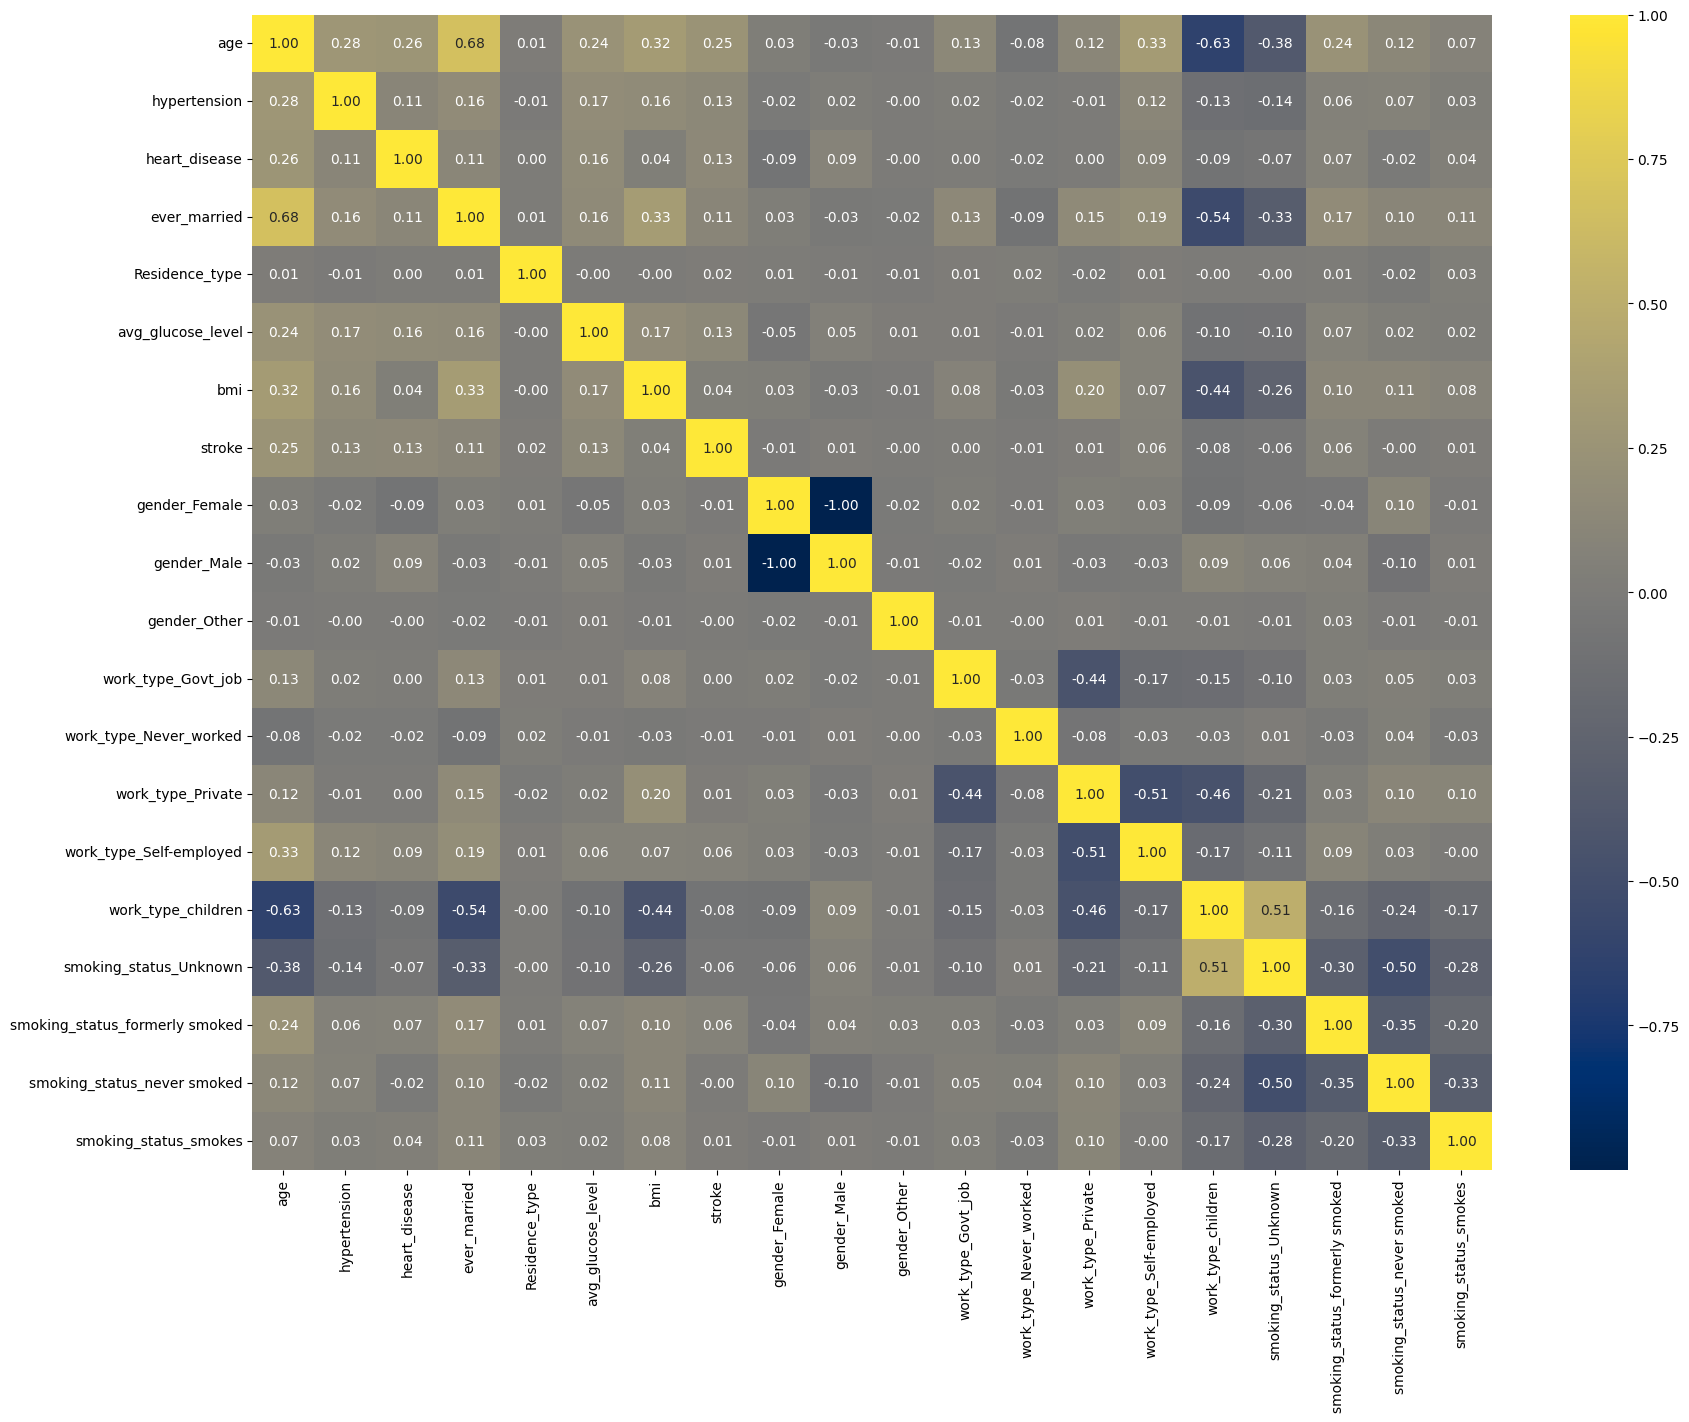

stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.036110
Residence_type                    0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
gender_Other                     -0.003166
smoking_status_never smoked      -0.004129
gender_Female                    -0.009027
work_type_Never_worked           -0.014882
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
Name: stroke, dtype: float64


In [393]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='cividis')
plt.show()

# 1. Selecciona SÓLO la columna 'stroke' de tu matriz
stroke_correlations = corr_matrix['stroke']

# 2. Ahora SÍ puedes ordenar esta lista (que es una Serie de Pandas)
#    ascending=False -> para que el más alto (1.00) salga primero
sorted_correlations = stroke_correlations.sort_values(ascending=False)

# 3. Imprime la lista ordenada
print(sorted_correlations)